# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [30]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [34]:
# Verificando as colunas disponíveis:
print(sinasc_raw.columns)

# Criando as faixas de Latitude:
sinasc_raw['Lat_Faixa'] = np.where(sinasc_raw['munResLat'] > -10.5, 'Acima de -10.5', 'Abaixo de -10.5')

# Selecionando duas variáveis numéricas para análise:
numerical_vars = ['PESO', 'IDADEMAE']

# Aplicando groupby e calcular as operações estatísticas:
grouped = sinasc_raw.groupby('Lat_Faixa')[numerical_vars].agg([
    ('soma','sum'), ('média','mean'), 'min', 'max', ('mediana','median'), ('desvio padrão','std'), ('variância','var')
])

grouped

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')


PESO                                                \
                     soma        média  min   max mediana desvio padrão   
Lat_Faixa                                                                 
Abaixo de -10.5  42101809  3240.096121  258  5985  3270.0    531.794694   
Acima de -10.5   45555148  3246.055864  295  5190  3275.0    556.487709   

                               IDADEMAE                             \
                     variância     soma      média min max mediana   
Lat_Faixa                                                            
Abaixo de -10.5  282805.596163   340167  26.178775  12  53    26.0   
Acima de -10.5   309678.570242   365094  26.014964  11  52    25.0   

                                          
                desvio padrão  variância  
Lat_Faixa                                 
Abaixo de -10.5      6.320171  39.944563  
Acima de -10.5       6.447663  41.572355

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [37]:
# Criando faixas para a área dos municípios:
sinasc_raw['Area_Faixa'] = np.where(sinasc_raw['munResArea'] > 3000, 'Acima de 3000', 'Abaixo de 3000')

# Selecionando as variáveis numéricas:
# Verificando as colunas disponíveis:
print(sinasc_raw.columns)

# Exemplo de variáveis numéricas:
variaveis = ['IDADEMAE', 'PESO'] 

# Aplicando groupby e calculando estatísticas:
grouped = sinasc_raw.groupby('Area_Faixa')[variaveis].agg([
    ('soma','sum'), ('média','mean'), 'min', 'max', 
    ('mediana','median'), ('desvio padrão','std'), ('variância','var')
])
# Exibindo o resultado:
grouped


Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea',
       'Lat_Faixa', 'Ar

IDADEMAE                                                      \
                   soma      média min max mediana desvio padrão  variância   
Area_Faixa                                                                    
Abaixo de 3000   137413  26.324330  11  53    26.0      6.305013  39.753192   
Acima de 3000    567848  26.038518  12  53    25.0      6.405497  41.030387   

                    PESO                                                \
                    soma        média  min   max mediana desvio padrão   
Area_Faixa                                                               
Abaixo de 3000  16799831  3218.358429  258  5720  3245.0    531.532175   
Acima de 3000   70857126  3249.134538  292  5985  3280.0    547.716582   

                              
                   variância  
Area_Faixa                    
Abaixo de 3000  282526.45265  
Acima de 3000   299993.45372

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [80]:
# Definindo as faixas para a variável munResAlt:
bins = [sinasc_raw['munResAlt'].min(), 100, 200, 300, sinasc_raw['munResAlt'].max()]
labels = ['<=100', '101-200', '201-300', '>300']
sinasc_raw['Alt_Faixa'] = pd.cut(sinasc_raw['munResAlt'], bins=bins, labels=labels, include_lowest=True)

# Selecionando duas variáveis numéricas ainda não utilizadas:
agg_funcs = {
    'SEMAGESTAC': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'APGAR1': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
}

grouped_alt = sinasc_raw.groupby('Alt_Faixa', observed=False).agg(agg_funcs)

# Exibindo os resultados:
grouped_alt


SEMAGESTAC                                                    \
                 sum       mean   min   max median       std       var   
Alt_Faixa                                                                
<=100       315378.0  38.573630  21.0  45.0   39.0  2.094690  4.387728   
101-200     444170.0  38.569816  19.0  45.0   39.0  2.012701  4.050966   
201-300     139377.0  38.470052  21.0  45.0   39.0  1.943323  3.776505   
>300         95691.0  38.678658  22.0  44.0   39.0  1.868020  3.489500   

            APGAR1                                                  
               sum      mean  min   max median       std       var  
Alt_Faixa                                                           
<=100      72983.0  8.270028  0.0  10.0    8.0  0.938107  0.880046  
101-200    95879.0  8.044215  0.0  10.0    8.0  1.015557  1.031356  
201-300    29912.0  8.066882  0.0  10.0    8.0  1.039990  1.081579  
>300       20375.0  8.219040  0.0  10.0    8.0  0.843735  0.711889

### Plotando as informações para uma melhor visualização:

C:\Users\User\AppData\Local\Temp\ipykernel_7644\1041530670.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = sinasc_raw.groupby('Alt_Faixa')[variaveis].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])


  Alt_Faixa    Variável Estatística     Valor
0     0-100  SEMAGESTAC         sum  315378.0
1   100-200  SEMAGESTAC         sum  444170.0
2   200-300  SEMAGESTAC         sum  139377.0
3   300-400  SEMAGESTAC         sum   25995.0
4   400-500  SEMAGESTAC         sum    8279.0


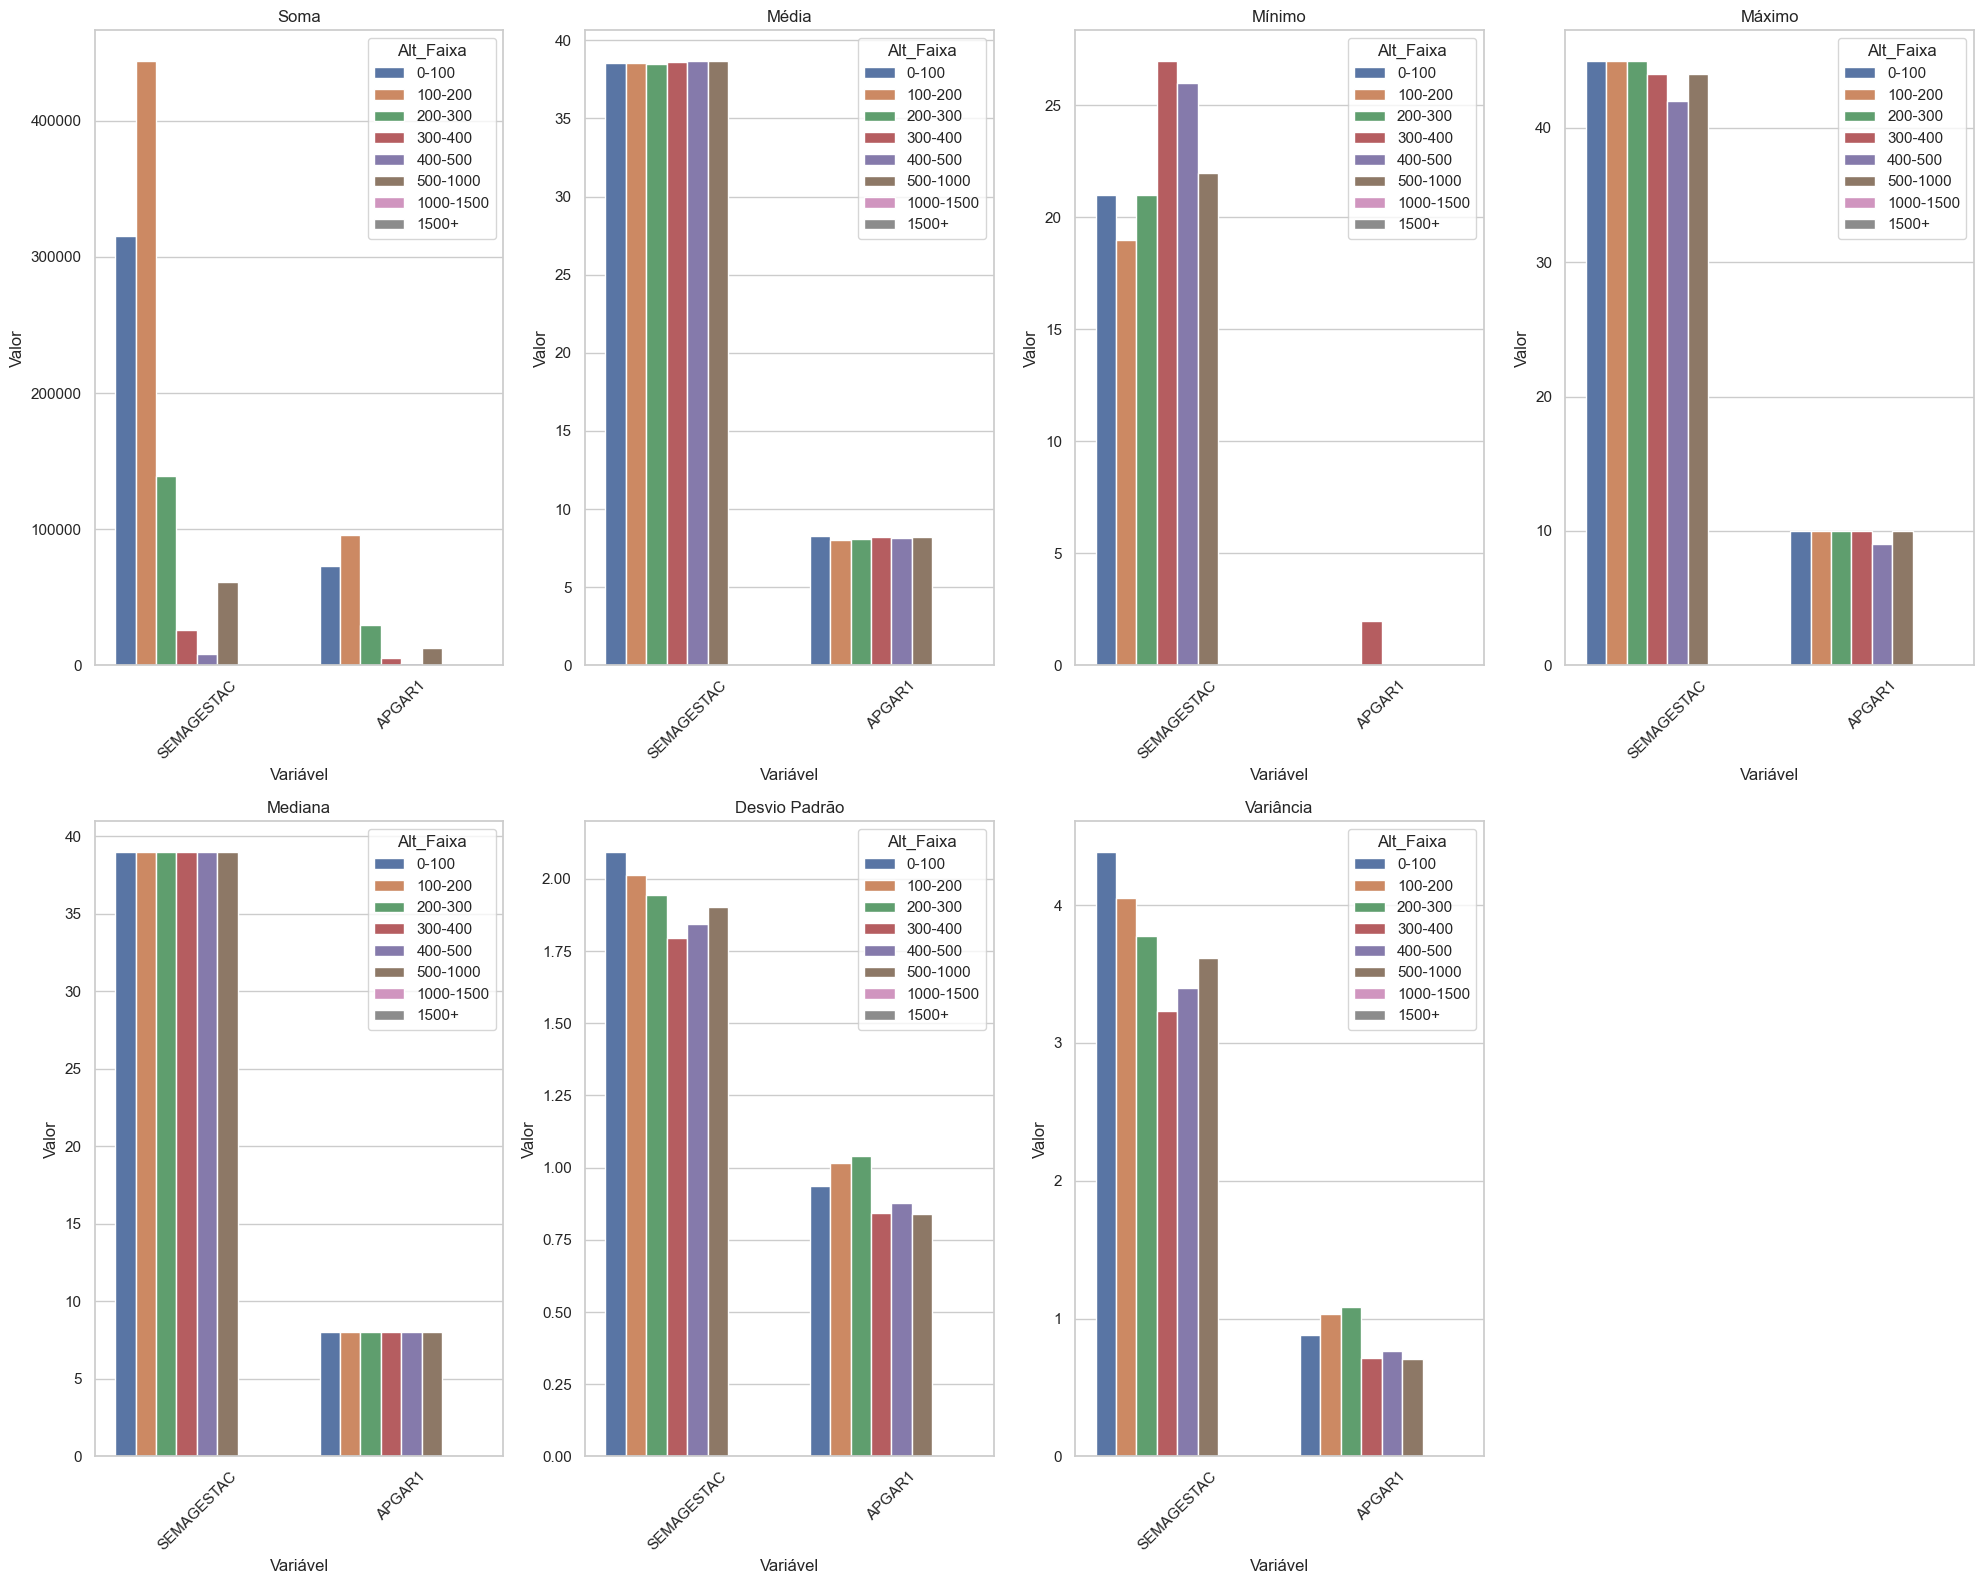

In [90]:
# Criar faixas para a variável munResAlt
bins = [0, 100, 200, 300, 400, 500, 1000, 1500, np.inf]
labels = ['0-100', '100-200', '200-300', '300-400', '400-500', '500-1000', '1000-1500', '1500+']
sinasc_raw['Alt_Faixa'] = pd.cut(sinasc_raw['munResAlt'], bins=bins, labels=labels, right=False)

# Selecionar as variáveis para análise
variaveis = ['SEMAGESTAC', 'APGAR1']

# Realizar operações de soma, média, mínimo, máximo, mediana, desvio padrão e variância
grouped = sinasc_raw.groupby('Alt_Faixa')[variaveis].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

# Reorganizar os dados para plotagem
grouped = grouped.reset_index()
grouped_melted = grouped.melt(id_vars='Alt_Faixa', var_name=['Variável', 'Estatística'], value_name='Valor')

# Verificar se os dados foram reorganizados corretamente
print(grouped_melted.head())

# Configuração dos gráficos
plt.figure(figsize=(20, 16))

# Plotar a soma
plt.subplot(2, 4, 1)
sns.barplot(data=grouped_melted[grouped_melted['Estatística'] == 'sum'], x='Variável', y='Valor', hue='Alt_Faixa')
plt.title('Soma')
plt.xticks(rotation=45)

# Plotar a média
plt.subplot(2, 4, 2)
sns.barplot(data=grouped_melted[grouped_melted['Estatística'] == 'mean'], x='Variável', y='Valor', hue='Alt_Faixa')
plt.title('Média')
plt.xticks(rotation=45)

# Plotar o mínimo
plt.subplot(2, 4, 3)
sns.barplot(data=grouped_melted[grouped_melted['Estatística'] == 'min'], x='Variável', y='Valor', hue='Alt_Faixa')
plt.title('Mínimo')
plt.xticks(rotation=45)

# Plotar o máximo
plt.subplot(2, 4, 4)
sns.barplot(data=grouped_melted[grouped_melted['Estatística'] == 'max'], x='Variável', y='Valor', hue='Alt_Faixa')
plt.title('Máximo')
plt.xticks(rotation=45)

# Plotar a mediana
plt.subplot(2, 4, 5)
sns.barplot(data=grouped_melted[grouped_melted['Estatística'] == 'median'], x='Variável', y='Valor', hue='Alt_Faixa')
plt.title('Mediana')
plt.xticks(rotation=45)

# Plotar o desvio padrão
plt.subplot(2, 4, 6)
sns.barplot(data=grouped_melted[grouped_melted['Estatística'] == 'std'], x='Variável', y='Valor', hue='Alt_Faixa')
plt.title('Desvio Padrão')
plt.xticks(rotation=45)

# Plotar a variância
plt.subplot(2, 4, 7)
sns.barplot(data=grouped_melted[grouped_melted['Estatística'] == 'var'], x='Variável', y='Valor', hue='Alt_Faixa')
plt.title('Variância')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### 4. Plote no mesmo gráfico, ao longo do tempo, a idade média das mulheres de cada região imediatas de Rondônia


In [44]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

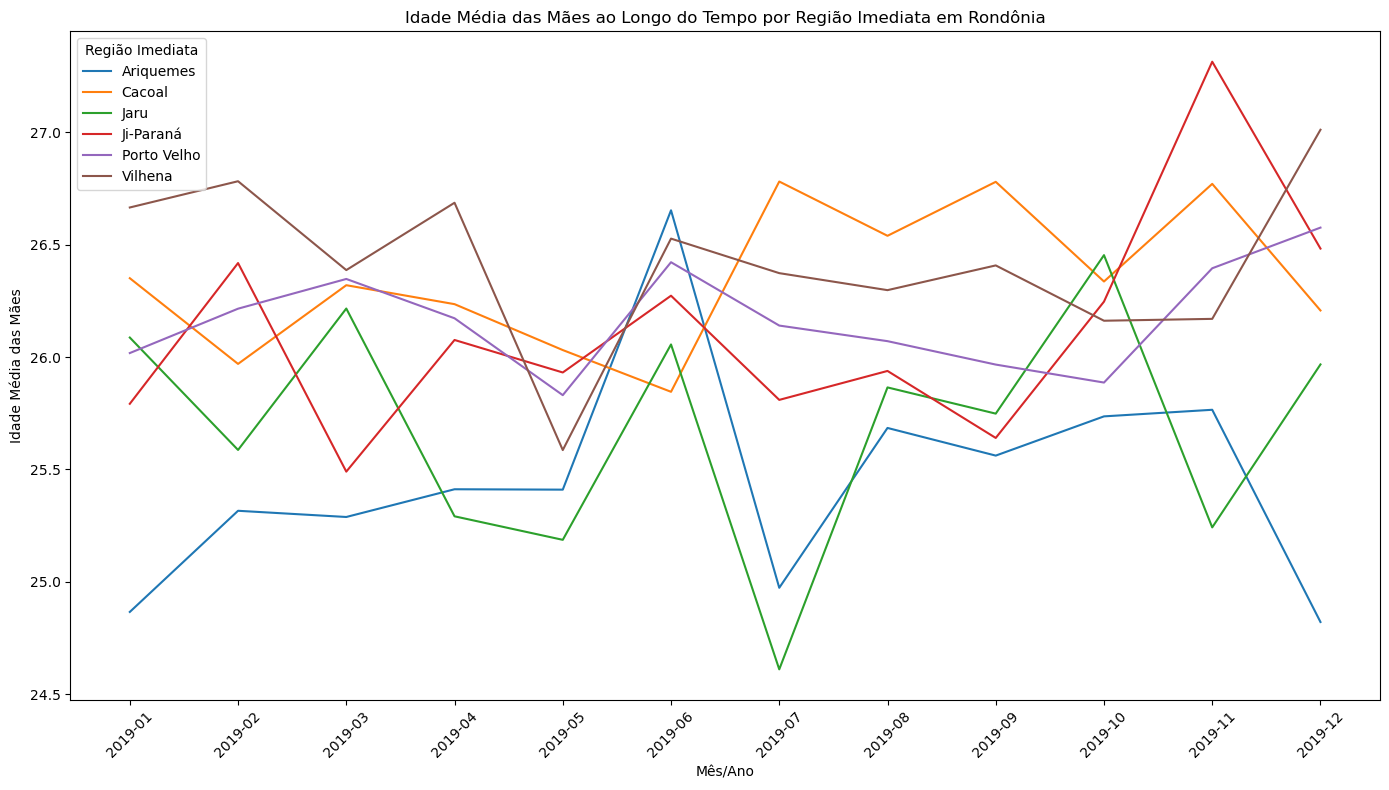

In [46]:
# Mapeando as cidades para suas regiões imediatas:
sinasc_raw['Regiao_Imediata'] = sinasc_raw['munResNome'].map(imediatas)

# Convertendo a coluna de data para datetime:
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'], format='%Y-%m-%d')

# Criando uma coluna para o mês e ano:
sinasc_raw['Mes_Ano'] = sinasc_raw['DTNASC'].dt.to_period('M')

# Calculando a idade média das mulheres por mês para cada região:
idade_media = sinasc_raw.groupby(['Mes_Ano', 'Regiao_Imediata'])['IDADEMAE'].mean().reset_index()

# Plotando os resultados:
plt.figure(figsize=(14, 8))
for regiao in idade_media['Regiao_Imediata'].unique():
    dados_regiao = idade_media[idade_media['Regiao_Imediata'] == regiao]
    plt.plot(dados_regiao['Mes_Ano'].astype(str), dados_regiao['IDADEMAE'], label=regiao)

plt.xlabel('Mês/Ano')
plt.ylabel('Idade Média das Mães')
plt.title('Idade Média das Mães ao Longo do Tempo por Região Imediata em Rondônia')
plt.legend(title='Região Imediata')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [48]:
# Dados de IDH dos municípios
idh_data = {
    "Porto Velho": 0.736,
    "Vilhena": 0.731,
    "Cacoal": 0.718,
    "Ji-Paraná": 0.714,
    "Pimenta Bueno": 0.710,
    "Ariquemes": 0.702,
    "Rolim de Moura": 0.700,
    "Cerejeiras": 0.692,
    "Jaru": 0.689,
    "Colorado do Oeste": 0.685,
    "Ouro Preto do Oeste": 0.682,
    "Espigão d'Oeste": 0.672,
    "Santa Luzia d'Oeste": 0.670,
    "Pimenteiras do Oeste": 0.665,
    "Presidente Médici": 0.664,
    "Castanheiras": 0.658,
    "Guajará-Mirim": 0.657,
    "Chupinguaia": 0.652,
    "Cabixi": 0.650,
    "Candeias do Jamari": 0.649,
    "São Felipe d'Oeste": 0.649,
    "Cacaulândia": 0.646,
    "São Miguel do Guaporé": 0.646,
    "Mirante da Serra": 0.643,
    "Alvorada d'Oeste": 0.643,
    "Teixeirópolis": 0.643,
    "Nova Brasilândia d'Oeste": 0.643,
    "Rio Crespo": 0.643,
    "Primavera de Rondônia": 0.641,
    "Alta Floresta d'Oeste": 0.641,
    "Ministro Andreazza": 0.638,
    "Novo Horizonte do Oeste": 0.634,
    "Vale do Paraíso": 0.627,
    "Alto Paraíso": 0.625,
    "Parecis": 0.617,
    "Buritis": 0.616,
    "Itapuã do Oeste": 0.614,
    "Corumbiara": 0.613,
    "Cujubim": 0.612,
    "Costa Marques": 0.611,
    "São Francisco do Guaporé": 0.611,
    "Urupá": 0.609,
    "Monte Negro": 0.607,
    "Seringueiras": 0.598,
    "Governador Jorge Teixeira": 0.596,
    "Machadinho d'Oeste": 0.596,
    "Campo Novo de Rondônia": 0.593,
    "Alto Alegre dos Parecis": 0.592,
    "Theobroma": 0.589,
    "Nova União": 0.587,
    "Nova Mamoré": 0.587,
    "Vale do Anari": 0.584,
}

# Definir faixas de IDH
def idh_faixa(idh):
    if idh >= 0.700:
        return 'Alto'
    elif 0.600 <= idh < 0.700:
        return 'Médio'
    elif 0.500 <= idh < 0.600:
        return 'Baixo'
    else:
        return 'Muito Baixo'

# Exemplo de DataFrame
df = pd.DataFrame({
    'munResNome': [
        'Porto Velho', 'Vilhena', 'Ji-Paraná', 'Ouro Preto do Oeste',
        'Santa Luzia d\'Oeste', 'Candeias do Jamari', 'Cacaulândia',
        'Mirante da Serra', 'Primavera de Rondônia', 'Seringueiras'
    ],
    'SEMAGESTAC': [200, 150, 120, 180, 170, 160, 140, 130, 110, 180],
    'APGAR1': [8, 7, 6, 7, 8, 8, 7, 6, 9, 7]
})

# Adicionar a coluna de faixa de IDH no DataFrame
df['IDH_Faixa'] = df['munResNome'].map(lambda x: idh_faixa(idh_data.get(x, 0)))

# Agrupar os dados pela faixa de IDH e calcular as operações desejadas
grouped_idh = df.groupby('IDH_Faixa').agg({
    'SEMAGESTAC': [('soma','sum'), ('média','mean'), 'min', 'max', ('mediana','median'), ('desvio padrão','std'), ('variância','var')],
    'APGAR1': [('soma','sum'), ('média','mean'), 'min', 'max', ('mediana','median'), ('desvio padrão','std'), ('variância','var')]
}).reset_index()

grouped_idh


IDH_Faixa SEMAGESTAC                                              \
                  soma       média  min  max mediana desvio padrão   
0      Alto        470  156.666667  120  200   150.0     40.414519   
1     Baixo        180  180.000000  180  180   180.0           NaN   
2     Médio        890  148.333333  110  180   150.0     26.394444   

               APGAR1                                                
     variância   soma média min max mediana desvio padrão variância  
0  1633.333333     21   7.0   6   8     7.0      1.000000       1.0  
1          NaN      7   7.0   7   7     7.0           NaN       NaN  
2   696.666667     45   7.5   6   9     7.5      1.048809       1.1

### Plotando as informações para uma melhor visualização:

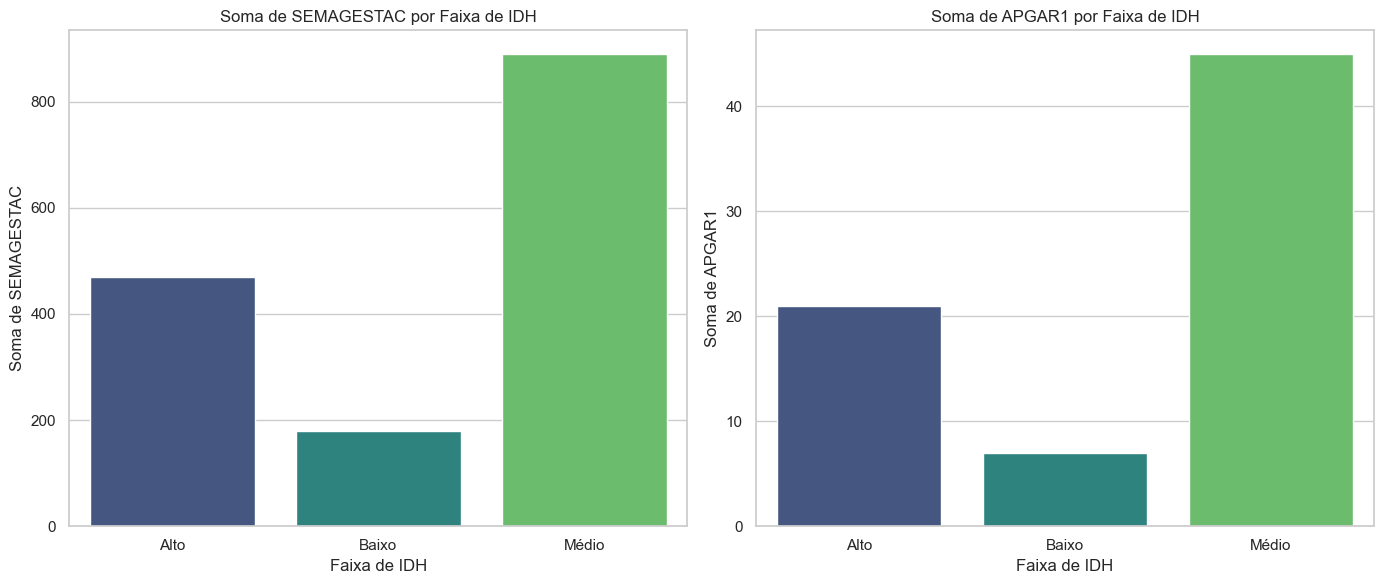

In [50]:
# Renomear colunas para facilitar a plotagem
grouped_idh.columns = ['IDH_Faixa', 'SEMAGESTAC_sum', 'SEMAGESTAC_mean', 'SEMAGESTAC_min', 'SEMAGESTAC_max', 'SEMAGESTAC_median', 'SEMAGESTAC_std', 'SEMAGESTAC_var', 'APGAR1_sum', 'APGAR1_mean', 'APGAR1_min', 'APGAR1_max', 'APGAR1_median', 'APGAR1_std', 'APGAR1_var']

# Ajustar o estilo dos gráficos
sns.set(style="whitegrid")

# Criar uma figura e eixos
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de barras para SEMAGESTAC
sns.barplot(x='IDH_Faixa', y='SEMAGESTAC_sum', data=grouped_idh, ax=ax[0], palette='viridis')
ax[0].set_title('Soma de SEMAGESTAC por Faixa de IDH')
ax[0].set_xlabel('Faixa de IDH')
ax[0].set_ylabel('Soma de SEMAGESTAC')

# Gráfico de barras para APGAR1
sns.barplot(x='IDH_Faixa', y='APGAR1_sum', data=grouped_idh, ax=ax[1], palette='viridis')
ax[1].set_title('Soma de APGAR1 por Faixa de IDH')
ax[1].set_xlabel('Faixa de IDH')
ax[1].set_ylabel('Soma de APGAR1')

# Ajustar o layout
plt.tight_layout()
plt.show()

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [52]:
# Dados de IFDM dos municípios
ifdm_data = {
    "Ariquemes": 0.7746,
    "Vilhena": 0.7465,
    "Pimenta Bueno": 0.7383,
    "Porto Velho": 0.7257,
    "Ji-Paraná": 0.7117,
    "Cacoal": 0.7111,
    "Santa Luzia d'Oeste": 0.6850,
    "Rolim de Moura": 0.6785,
    "Chupinguaia": 0.6766,
    "São Miguel do Guaporé": 0.6699,
    "Pimenteiras do Oeste": 0.6501,
    "Teixeirópolis": 0.6500,
    "Colorado do Oeste": 0.6473,
    "Jaru": 0.6450,
    "Rio Crespo": 0.6430,
    "Primavera de Rondônia": 0.6384,
    "Alta Floresta d'Oeste": 0.6337,
    "Ouro Preto do Oeste": 0.6261,
    "São Francisco do Guaporé": 0.6214,
    "Candeias do Jamari": 0.6199,
    "São Felipe d'Oeste": 0.6153,
    "Presidente Médici": 0.6140,
    "Cerejeiras": 0.6137,
    "Monte Negro": 0.6016,
    "Urupá": 0.6006,
    "Espigão d'Oeste": 0.5973,
    "Seringueiras": 0.5922,
    "Alvorada d'Oeste": 0.5919,
    "Itapuã do Oeste": 0.5903,
    "Cabixi": 0.5887,
    "Novo Horizonte do Oeste": 0.5858,
    "Nova Brasilândia d'Oeste": 0.5857,
    "Vale do Paraíso": 0.5818,
    "Corumbiara": 0.5759,
    "Alto Paraíso": 0.5735,
    "Cacaulândia": 0.5721,
    "Vale do Anari": 0.5710,
    "Ministro Andreazza": 0.5657,
    "Costa Marques": 0.5626,
    "Nova União": 0.5571,
    "Guajará-Mirim": 0.5541,
    "Mirante da Serra": 0.5519,
    "Parecis": 0.5502,
    "Castanheiras": 0.5430,
    "Theobroma": 0.5405,
    "Machadinho d'Oeste": 0.5322,
    "Campo Novo de Rondônia": 0.5272,
    "Nova Mamoré": 0.5084,
    "Cujubim": 0.5055,
    "Alto Alegre dos Parecis": 0.5046,
    "Governador Jorge Teixeira": 0.4562
}

# Definir faixas de IFDM
def ifdm_faixa(ifdm):
    if ifdm >= 0.700:
        return 'Alto'
    elif 0.600 <= ifdm < 0.700:
        return 'Médio'
    elif 0.500 <= ifdm < 0.600:
        return 'Baixo'
    else:
        return 'Muito Baixo'

# Adicionar a coluna de faixa de IFDM no DataFrame
sinasc_raw['IFDM_Faixa'] = sinasc_raw['munResNome'].map(lambda x: ifdm_faixa(ifdm_data.get(x, 0)))

# Agrupar os dados pela faixa de IFDM e calcular as operações desejadas
grouped_ifdm = sinasc_raw.groupby('IFDM_Faixa').agg({
    'SEMAGESTAC': [('soma', 'sum'), ('média', 'mean'), 'min', 'max', ('mediana', 'median'), ('desvio padrão', 'std'), ('variância', 'var')],
    'APGAR1': [('soma', 'sum'), ('média', 'mean'), 'min', 'max', ('mediana', 'median'), ('desvio padrão', 'std'), ('variância', 'var')]
}).reset_index()

grouped_ifdm


IFDM_Faixa SEMAGESTAC                                               \
                     soma      média   min   max mediana desvio padrão   
0         Alto   578645.0  38.589196  19.0  45.0    39.0      2.036768   
1        Baixo   131618.0  38.518584  19.0  45.0    39.0      2.065601   
2  Muito Baixo    98862.0  38.572766  22.0  45.0    39.0      2.072004   
3        Médio   185527.0  38.531049  21.0  45.0    39.0      1.884663   

               APGAR1                                                       
  variância      soma     média  min   max mediana desvio padrão variância  
0  4.148423  129774.0  8.177316  0.0  10.0     8.0      0.960530  0.922619  
1  4.266707   28666.0  8.106900  0.0  10.0     8.0      1.003472  1.006957  
2  4.293200   21092.0  8.031988  0.0  10.0     8.0      1.111895  1.236310  
3  3.551954   39626.0  8.086939  0.0  10.0     8.0      0.969947  0.940797

### Plotando as informações para uma melhor visualização:

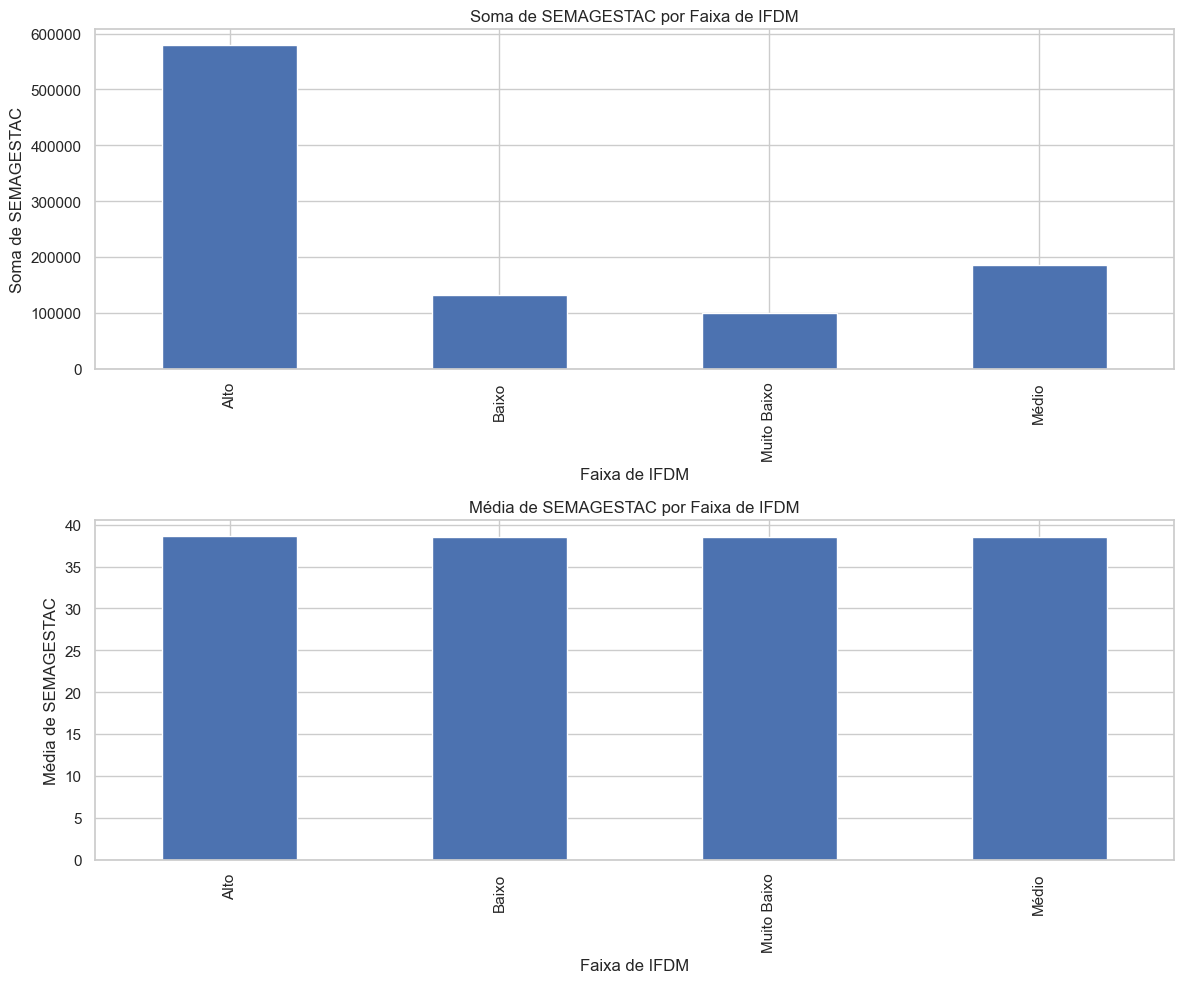

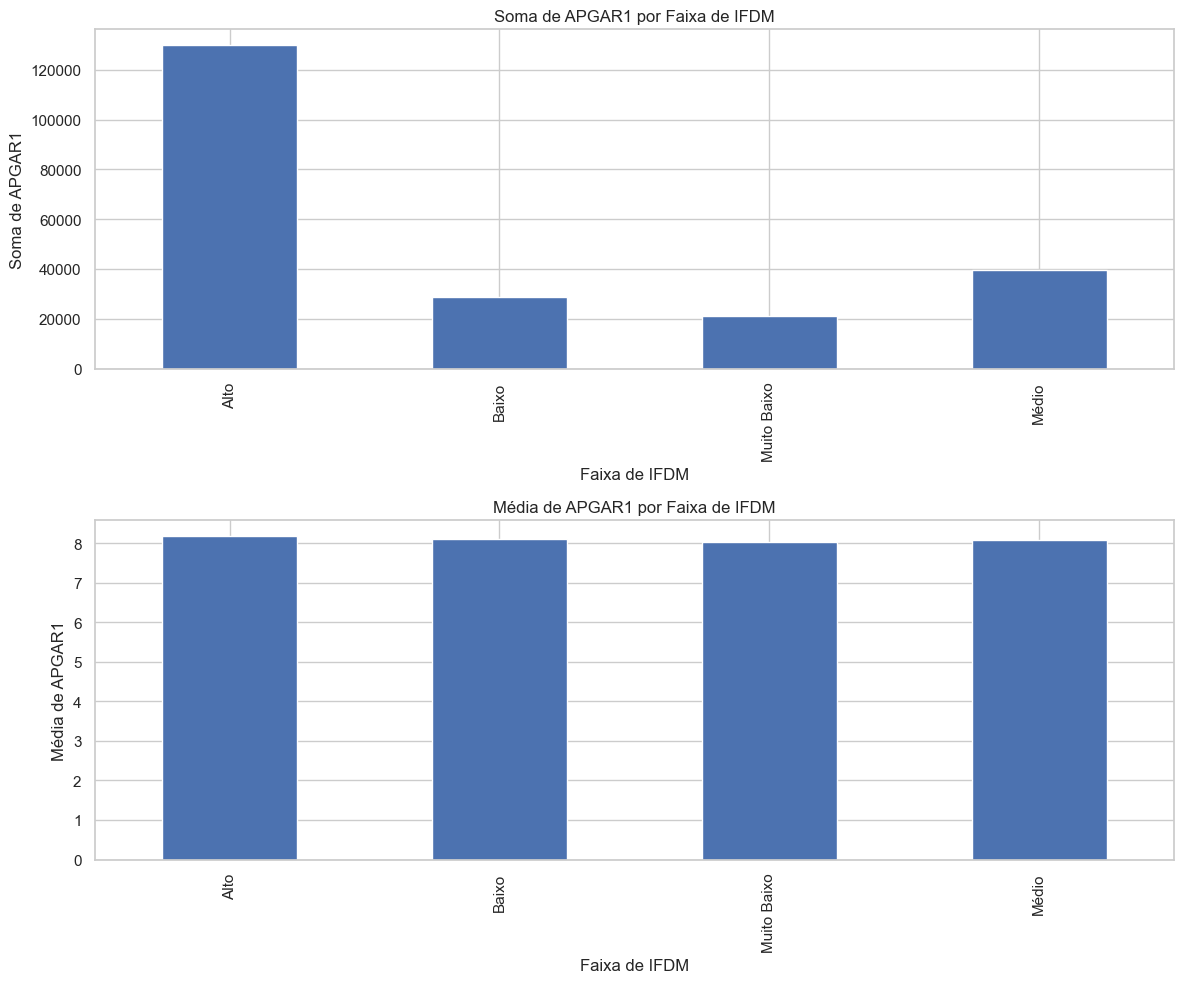

In [54]:
# Plotar gráficos de barras para SEMAGESTAC
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Soma de SEMAGESTAC por faixa de IFDM
grouped_ifdm.plot(kind='bar', x='IFDM_Faixa', y=('SEMAGESTAC', 'soma'), ax=ax[0], legend=False)
ax[0].set_title('Soma de SEMAGESTAC por Faixa de IFDM')
ax[0].set_ylabel('Soma de SEMAGESTAC')
ax[0].set_xlabel('Faixa de IFDM')

# Média de SEMAGESTAC por faixa de IFDM
grouped_ifdm.plot(kind='bar', x='IFDM_Faixa', y=('SEMAGESTAC', 'média'), ax=ax[1], legend=False)
ax[1].set_title('Média de SEMAGESTAC por Faixa de IFDM')
ax[1].set_ylabel('Média de SEMAGESTAC')
ax[1].set_xlabel('Faixa de IFDM')

plt.tight_layout()
plt.show()

# Plotar gráficos de barras para APGAR1
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Soma de APGAR1 por faixa de IFDM
grouped_ifdm.plot(kind='bar', x='IFDM_Faixa', y=('APGAR1', 'soma'), ax=ax[0], legend=False)
ax[0].set_title('Soma de APGAR1 por Faixa de IFDM')
ax[0].set_ylabel('Soma de APGAR1')
ax[0].set_xlabel('Faixa de IFDM')

# Média de APGAR1 por faixa de IFDM
grouped_ifdm.plot(kind='bar', x='IFDM_Faixa', y=('APGAR1', 'média'), ax=ax[1], legend=False)
ax[1].set_title('Média de APGAR1 por Faixa de IFDM')
ax[1].set_ylabel('Média de APGAR1')
ax[1].set_xlabel('Faixa de IFDM')

plt.tight_layout()
plt.show()


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [56]:
# Dados de PIB dos municípios
pib_data = {
    "Porto Velho": 17912070,
    "Ji-Paraná": 3783972,
    "Vilhena": 2831175,
    "Ariquemes": 2579830,
    "Cacoal": 2261644,
    "Jaru": 1500890,
    "Rolim de Moura": 1283434,
    "Pimenta Bueno": 1164877,
    "Guajará-Mirim": 893000,
    "Ouro Preto do Oeste": 834000,
    "Buritis": 726000,
    "Machadinho do Oeste": 633000,
    "Espigão d'Oeste": 625000,
    "São Miguel do Guaporé": 616000,
    "Candeias do Jamari": 548000,
    "Nova Mamoré": 529000,
    "Cerejeiras": 507000,
    "Alta Floresta do Oeste": 496000,
    "Presidente Médici": 428000,
    "Cujubim": 385000,
    "Nova Brasilândia do Oeste": 360000,
    "Alto Paraíso": 358000,
    "São Francisco do Guaporé": 353000,
    "Colorado do Oeste": 335000,
    "Monte Negro": 219152,
    "Alto Alegre dos Parecis": 213410,
    "Campo Novo de Rondônia": 208821,
    "Alvorada do Oeste": 204098,
    "Chupinguaia": 190331,
    "Corumbiara": 188218,
    "Ministro Andreazza": 174633,
    "Urupá": 172143,
    "Costa Marques": 171878,
    "Seringueiras": 169429,
    "Mirante da Serra": 163955,
    "Governador Jorge Teixeira": 148027,
    "Theobroma": 140601,
    "Santa Luzia do Oeste": 135934,
    "Novo Horizonte do Oeste": 129399,
    "Itapuã do Oeste": 129351,
    "Vale do Paraíso": 116742,
    "Cacaulândia": 116635,
    "Cabixi": 113031,
    "Vale do Anari": 105208,
    "Nova União": 92346,
    "Parecis": 80759,
    "Rio Crespo": 76854,
    "Pimenteiras do Oeste": 76756,
    "Teixeirópolis": 72089,
    "São Felipe do Oeste": 72084,
    "Castanheiras": 59779,
    "Primavera de Rondônia": 52908
}

# Definir faixas de PIB
def pib_faixa(pib):
    if pib > 1000000000:
        return 'Acima de 1 Bilhão'
    elif pib > 500000000:
        return 'Acima de 500 Milhões'
    elif pib > 300000000:
        return 'Acima de 300 Milhões'
    elif pib > 200000000:
        return 'Acima de 200 Milhões'
    elif pib > 100000000:
        return 'Acima de 100 Milhões'
    else:
        return 'Até 100 Milhões'

# Adicionar a coluna de faixa de PIB no DataFrame
sinasc_raw['PIB_Faixa'] = sinasc_raw['munResNome'].map(lambda x: pib_faixa(pib_data.get(x, 0)))

# Agrupar os dados pela faixa de PIB e calcular as operações desejadas
grouped_pib = sinasc_raw.groupby('PIB_Faixa').agg({
    'SEMAGESTAC': [('soma', 'sum'), ('média', 'mean'), 'min', 'max', ('mediana', 'median'), ('desvio padrão', 'std'), ('variância', 'var')],
    'APGAR1': [('soma', 'sum'), ('média', 'mean'), 'min', 'max', ('mediana', 'median'), ('desvio padrão', 'std'), ('variância', 'var')],
}).reset_index()

grouped_pib

PIB_Faixa SEMAGESTAC                                               \
                         soma      média   min   max mediana desvio padrão   
0  Até 100 Milhões   994652.0  38.567352  19.0  45.0    39.0      2.016802   

               APGAR1                                                       
  variância      soma     média  min   max mediana desvio padrão variância  
0   4.06749  219158.0  8.137457  0.0  10.0     8.0      0.984925  0.970077

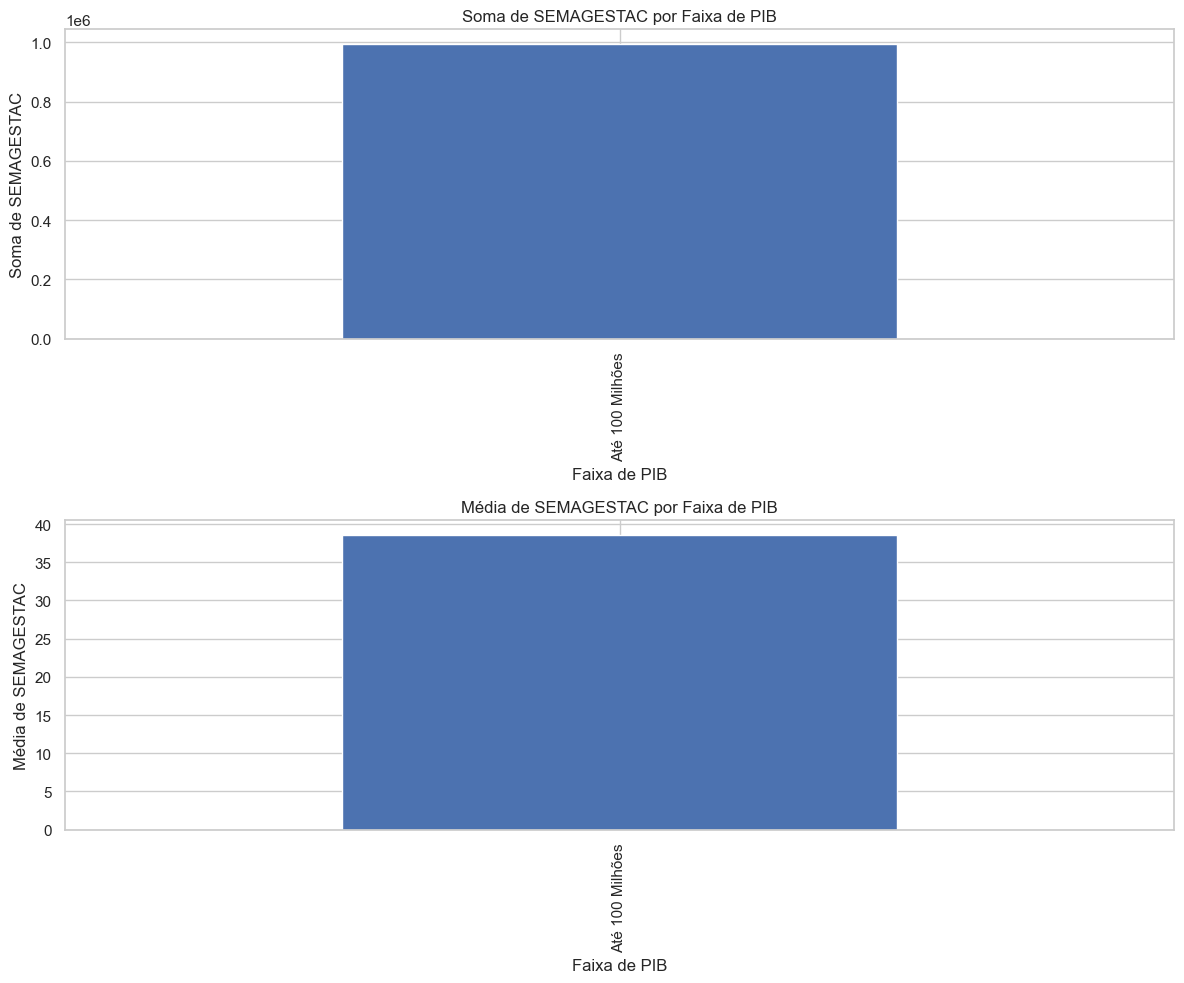

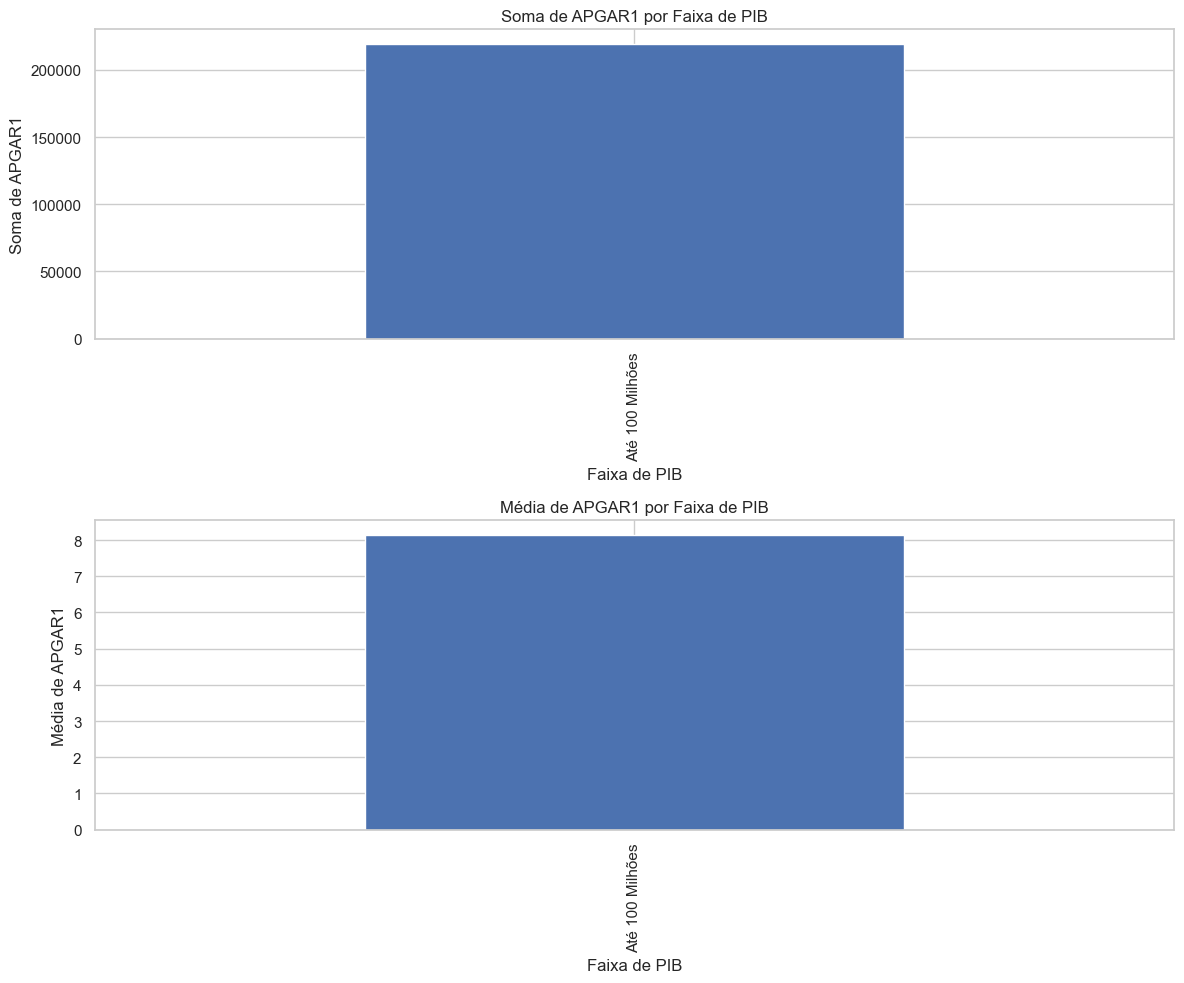

In [58]:
# Plotar gráficos de barras para SEMAGESTAC
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Soma de SEMAGESTAC por faixa de PIB
grouped_pib.plot(kind='bar', x='PIB_Faixa', y=('SEMAGESTAC', 'soma'), ax=ax[0], legend=False)
ax[0].set_title('Soma de SEMAGESTAC por Faixa de PIB')
ax[0].set_ylabel('Soma de SEMAGESTAC')
ax[0].set_xlabel('Faixa de PIB')

# Média de SEMAGESTAC por faixa de PIB
grouped_pib.plot(kind='bar', x='PIB_Faixa', y=('SEMAGESTAC', 'média'), ax=ax[1], legend=False)
ax[1].set_title('Média de SEMAGESTAC por Faixa de PIB')
ax[1].set_ylabel('Média de SEMAGESTAC')
ax[1].set_xlabel('Faixa de PIB')

plt.tight_layout()
plt.show()

# Plotar gráficos de barras para APGAR1
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Soma de APGAR1 por faixa de PIB
grouped_pib.plot(kind='bar', x='PIB_Faixa', y=('APGAR1', 'soma'), ax=ax[0], legend=False)
ax[0].set_title('Soma de APGAR1 por Faixa de PIB')
ax[0].set_ylabel('Soma de APGAR1')
ax[0].set_xlabel('Faixa de PIB')

# Média de APGAR1 por faixa de PIB
grouped_pib.plot(kind='bar', x='PIB_Faixa', y=('APGAR1', 'média'), ax=ax[1], legend=False)
ax[1].set_title('Média de APGAR1 por Faixa de PIB')
ax[1].set_ylabel('Média de APGAR1')
ax[1].set_xlabel('Faixa de PIB')

plt.tight_layout()
plt.show()


### Analise as respostas encontradas:

1. Entendemos que a idade média das mães gestantes, por regiões imediatadas do estado de Rondônia, é de 26 anos.
2. Podemos afirmar que quanto maior a faixa de PIB, maior o índice de APGAR 1, acima de 8.
3. O mesmo é observado com relação ao período de gestação: quanto mais tempo, o que é esperado para uma boa gestação, maior o índice de APGAR 1, acima de 8.
4. Nesse caso, observamos que quanto maior a qualidade de vida da gestante e quanto maior o crescimento econômico de uma região, maiores as chances do bebê nascer com maior peso e mais saudável.